In [236]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import time
import cProfile
import math

%matplotlib inline

#start_time = time.time()
#print("--- %s seconds ---" % (time.time() - start_time))
#cProfile.run('')
#%prun
DS = pd.read_csv("d:/DataSet.csv");

$$\text{Distance calculation formula}$$
$$\text{}$$
$$\phi_1,\phi_2 \text{  - Latitude}$$
$$\lambda \text{  - Longitude difference}$$

$$ \Delta \sigma = \arctan \left\{ \frac{ \sqrt{[\cos\phi_2\sin\Delta\lambda]^2+[\cos\phi_1\sin\phi_2-\sin\phi_1\cos\phi_2\cos\Delta\lambda]^2}         }{  \sin\phi_1\sin\phi_2+ \cos\phi_1\cos\phi_2\cos\Delta\lambda  } \right\} $$

$$\text{Distance:  } D = R_{earth}\Delta\sigma$$

In [237]:
#functions
###############################################################################
to_sec   = lambda x: (x//10000)*60**2 + (x%10000//100)*60 + x%10000%100 #hh/mm/ss
###############################################################################
#print_popular = lambda x: print('%s Most popular places\n\n' % str(x), DS.iloc[:,1:3].head(x))
###############################################################################
def print_popular(x):
    print('%s Most popular places\n\n' % str(x), DS.iloc[:,1:3].head(x))
    plt.rcParams["figure.figsize"] = 12.8, 9.6
    pl = plt.axes(projection='3d')
    pl.scatter(DS.Latitude[0:x], DS.Longitude[0:x], DS.AvrTime[0:x], cmap='BrBG', linewidth=1)
###############################################################################
###############################################################################
def distance(lat1, lat2, long1, long2): #not used
    
    rad = 6372795
    
    lat1 =  lat1*math.pi/180.
    lat2 =  lat2*math.pi/180.
    long1 = long1*math.pi/180.
    long2 = long2*math.pi/180.

    cl1 = math.cos(lat1)
    cl2 = math.cos(lat2)
    sl1 = math.sin(lat1)
    sl2 = math.sin(lat2)
     
    delta = long2 - long1
    cdelta = math.cos(delta)
    sdelta = math.sin(delta)
     
    y = math.sqrt( (cl2*sdelta)**2 + (cl1*sl2-sl1*cl2*cdelta)**2 )
    x = sl1*sl2+cl1*cl2*cdelta
    ad = math.atan2(y,x)
     
    return round(ad*rad)
##############################################################################

In [238]:
DS.drop( (DS.iloc[:,0:1] + DS.iloc[:,2:10] + DS.iloc[:,12: len(DS.columns)] ), inplace = True,  axis = 1)
DS.drop( [0,1]                                                               , inplace = True,  axis = 0)
DS.columns = ['Time','Latitude','Longitude']
DS.reset_index(inplace = True, drop = True)

DS['Latitude']  = DS['Latitude'].astype(float)
DS['Longitude'] = DS['Longitude'].astype(float)

DS['Day'] = DS.apply(lambda row: int(row.Time[8:10]), axis = 1)
DS['dt'] =  DS.apply(lambda row: int(row.Time.replace(':','')[11:]), axis = 1) #str time to int
DS = DS.loc[DS['Day'] == 27] 
DS['dt'] =  to_sec(DS.dt)
DS['dt'] =  DS.dt.diff(-1) #dt 

In [239]:
DS.dropna(axis = 0, inplace = True)
pd.options.display.max_rows = 1500
DS['AvrTime'] = DS.groupby(by=['Latitude','Longitude'], as_index=False)['dt'].transform(lambda x: np.sum(x.values))
DS.drop_duplicates(subset=['Latitude', 'Longitude'], inplace = True)
DS.sort_values(by=['AvrTime'],  ascending = False, inplace = True)
DS.reset_index(inplace = True, drop = True)

10 Most popular places

     Latitude  Longitude
0  57.988798  56.206603
1  57.983723  56.298640
2  57.983695  56.298766
3  57.983701  56.298749
4  57.988838  56.204971
5  57.983701  56.298748
6  57.989179  56.204453
7  57.988666  56.204560
8  57.988831  56.204878
9  57.989550  56.205021


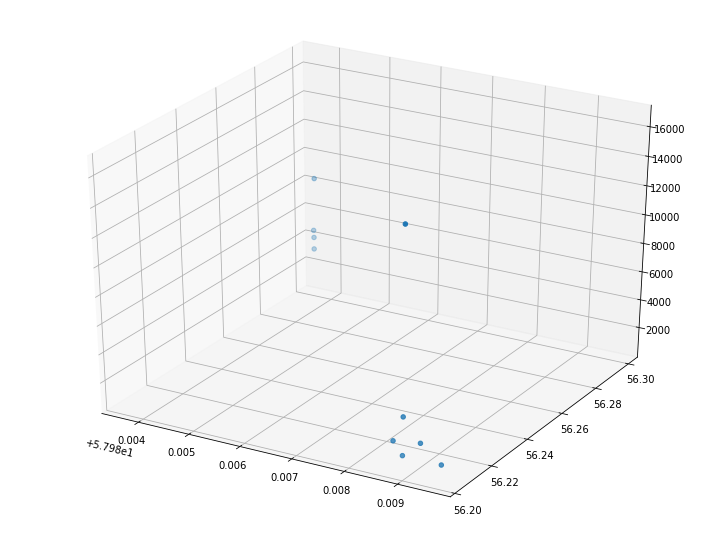

In [240]:
print_popular(10)

In [241]:
DS

,Time,Latitude,Longitude,Day,dt,AvrTime
0,2019-09-27 20:58:35,57.988798,56.206603,27,928.0,16316.0
1,2019-09-27 4:59:24,57.983723,56.298640,27,48.0,8606.0
2,2019-09-27 2:01:40,57.983695,56.298766,27,51.0,4828.0
3,2019-09-27 10:39:47,57.983701,56.298749,27,47.0,4314.0
4,2019-09-27 20:01:33,57.988838,56.204971,27,930.0,3688.0
5,2019-09-27 10:22:17,57.983701,56.298748,27,47.0,3470.0
6,2019-09-27 13:18:48,57.989179,56.204453,27,856.0,2205.0
7,2019-09-27 19:25:31,57.988666,56.204560,27,46.0,1920.0
8,2019-09-27 21:43:53,57.988831,56.204878,27,996.0,996.0
9,2019-09-27 18:11:44,57.989550,56.205021,27,890.0,963.0
